# VR: Key Ideas

**Goal:** This is my first time working with the VR track jets, so I just wanted to take a second to jot down some key ideas for why we're using them.

Variable radius track jets came up as a way to do boosted Higgs tagging, where to have two b-tags inside of the jet, we need two identify the two b-hadron axes inside of the large-R jet.  
The original way to do this was to use something called track jets, where instead of forming the jet by clustering topoclusters with the anti-$k_T$ alg, you instead cluster the tracks [in the event](https://cds.cern.ch/record/2661823/files/PERF-2017-04-001.pdf?).
For example, from the previous iteration of the boosted $hh\rightarrow 4b$ analysis, they found that their performance was optimal when they used $R=0.2$ track jets. However, for their higher resonance mass points, they started to see a decrease in performance due to the $R=0.2$ track jets becoming merged so that you no longer could resolve the two b-hadron axes.

To mitigate this problem [Krohn, Thaler, and Wang](https://arxiv.org/pdf/0903.0392.pdf) proposed an algorithm which mitigates this effect by shrinking the radius for reclustering according to the anti-$k_T$ algorithm based on the $p_T$ of the jet, since tracks coming from boosted b-hadrons are expected to be *more collimated*, as is demonstrated in the figure below.

<img src="../../figures/fixed_vs_VR.png" width="400">

**Subtlety that comes up with the reclustering**

Put in description of the anti-$k_T$ alg, and explanation how you need an additional iterative step to check whether or not the jet should be clustered according to the new R.


**Free parameters**
- $\rho, R_{min},R_{max}$

A plot demonstrating how this works is shown below, taken from the paper optimizing this for ...

<img src="../../figures/VR_varyRho.png" width="400">

**ATLAS's implementation of the VR alg**
- $\rho = 30 $ GeV
- $R_{min} = 0.02$
- $R_{max} = 0.4$

This choice of parameters is also what was used for the hyperparameters in the [ATLAS advanced double b-taggers note](https://cds.cern.ch/record/2268678/files/ATL-PHYS-PUB-2017-010.pdf). 

**Flavor tag association cone**

$$\Delta R(\text{track,subjet}) < 0.239 + \exp[-1.220 - 1.64 \times 10^{-5} \cdot p_T]$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../..")
from usefulFcts import VR, ftag_cone

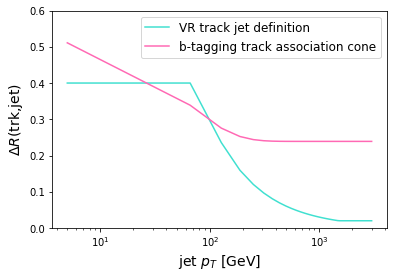

In [3]:
# There's a 20 GeV cut on b-jets
pt = np.linspace(5,3e3)
plt.semilogx(pt,VR(pt),'turquoise',label='VR track jet definition')
plt.semilogx(pt,ftag_cone(pt),'hotpink',label='b-tagging track association cone')

plt.xlabel('jet $p_T$ [GeV]',fontsize=14)
plt.ylabel('$\Delta R$(trk,jet)',fontsize=14)
plt.ylim(0,0.6)
plt.legend(fontsize=12)

plt.savefig('../../figures/VR_and_ftag_cone.pdf')
plt.show()

For most cases, the FTAG association cone is *looser* than the VR track jet definition cone.

This makes sense, because for b-tagging, we want a track selections that are *efficient* at selecting the HF tracks, whereas for the track jet definition, we want to be as accurate as possible at getting the axis to be a close proxy for the b-hadron flight direction.  

### Overlap removal

- [Current recommendation](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/BTagCalib2017)


- Santiago's results, why we think we want this overlap removal cut at the analysis level.


**References:**
1. Jets with Variable R. arXiv 0903.0392.
2. Variable Radius, Exclusive-$k_T$, and Center-of-Mass Subjet Reconstruction for Higgs($\rightarrow b\bar{b}$) Tagging in ATLAS. ATL-PHYS-PUB-2017-010.
